In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import f_classif
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold


In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE


In [93]:
df = pd.read_csv(r'C:\Users\Hiteesh\Downloads\loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# EXPLORATORY DATA ANALYSIS

In [94]:
df.describe(include='all')

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269,4269,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Graduate,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Approved
freq,NaN,NaN,2144,2150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2656
mean,2135.000000,2.498712,NaN,NaN,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,NaN
std,1232.498479,1.695910,NaN,NaN,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,NaN
min,1.000000,0.000000,NaN,NaN,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,NaN
25%,1068.000000,1.000000,NaN,NaN,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,NaN
50%,2135.000000,3.000000,NaN,NaN,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,NaN
75%,3202.000000,4.000000,NaN,NaN,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,NaN


In [95]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [97]:
df.duplicated().sum()

0

df.isna().sum()

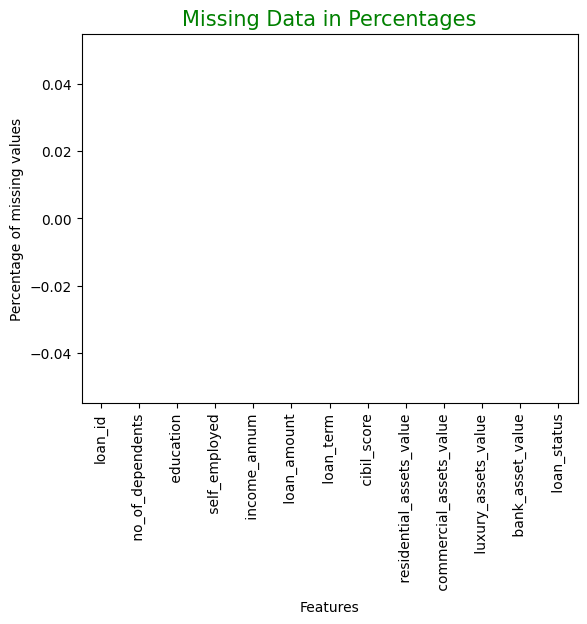

In [98]:
df.isnull().mean().plot.bar()
plt.ylabel('Percentage of missing values')
plt.xlabel('Features')
plt.title('Missing Data in Percentages', color='Green', fontsize=15);

In [99]:
#Checking the number of categorical columns in the dataset
cat_var = df.select_dtypes(include='object').columns
print(cat_var)

Index([' education', ' self_employed', ' loan_status'], dtype='object')


In [100]:
#Checking for the unique values in the categorical column
for i in cat_var:
    print("The no.of unique values in",i,"are: ",df.loc[:,i].nunique())

The no.of unique values in  education are:  2
The no.of unique values in  self_employed are:  2
The no.of unique values in  loan_status are:  2


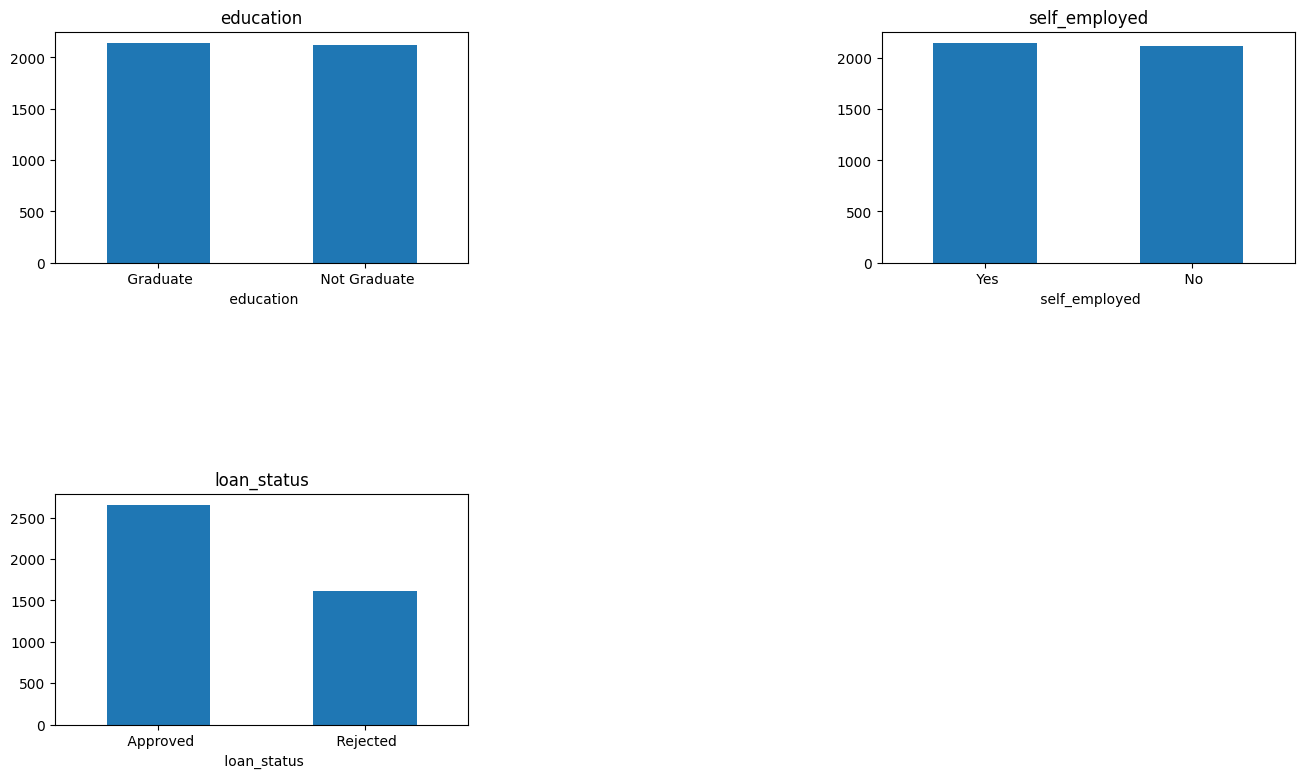

In [101]:
# plotting categorical values
plt.subplot(221)

df[' education'].value_counts().plot(kind='bar', title='education', figsize=(16,9))

plt.xticks(rotation=0)

plt.subplot(222)

df[' self_employed'].value_counts().plot(kind='bar', title='self_employed')

plt.xticks(rotation=0)

plt.subplot(223)

df[' loan_status'].value_counts().plot(kind='bar', title='loan_status')
plt.xticks(rotation=0)

plt.subplots_adjust(wspace=1, hspace=1)
plt.show()

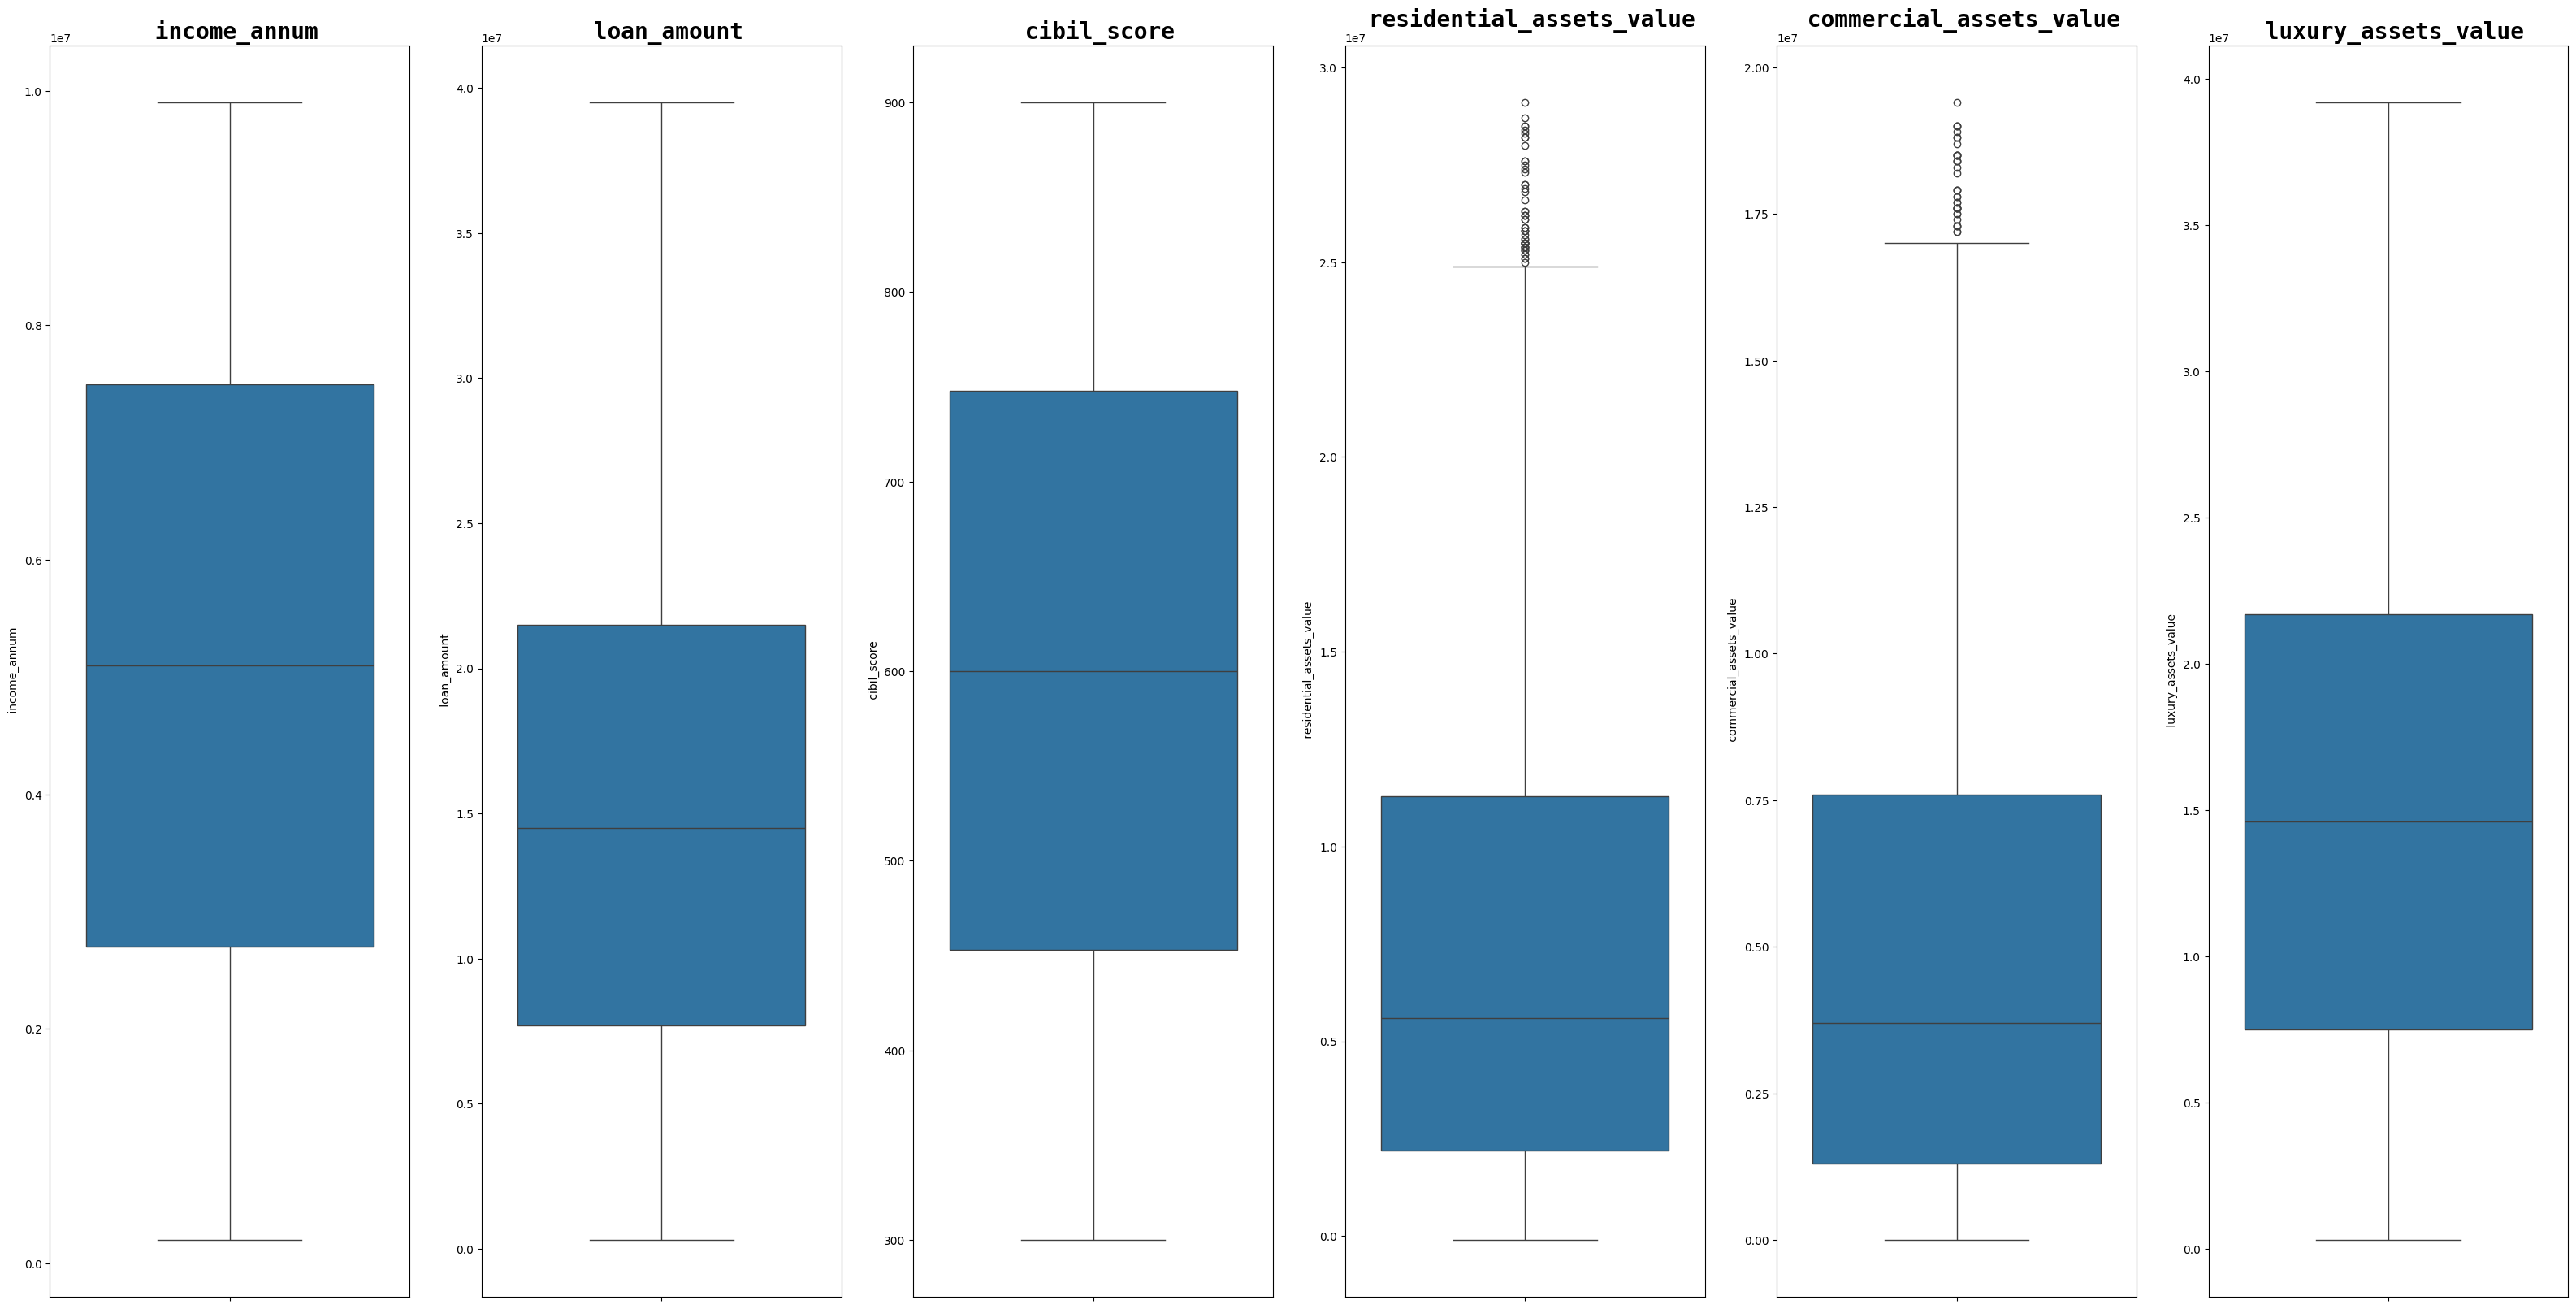

In [102]:
#Checking for outliers in the numerical columns
num_cols=[' income_annum',' loan_amount', ' cibil_score',' residential_assets_value',' commercial_assets_value', ' luxury_assets_value']

fig, ax = plt.subplots(1, len(num_cols), figsize = (40, 20))
for i, col in enumerate(num_cols):
    g = sns.boxplot(data = df, y = col, ax = ax[i])
    g.set_title(col, weight = "bold", fontsize = 20, fontname = "monospace")

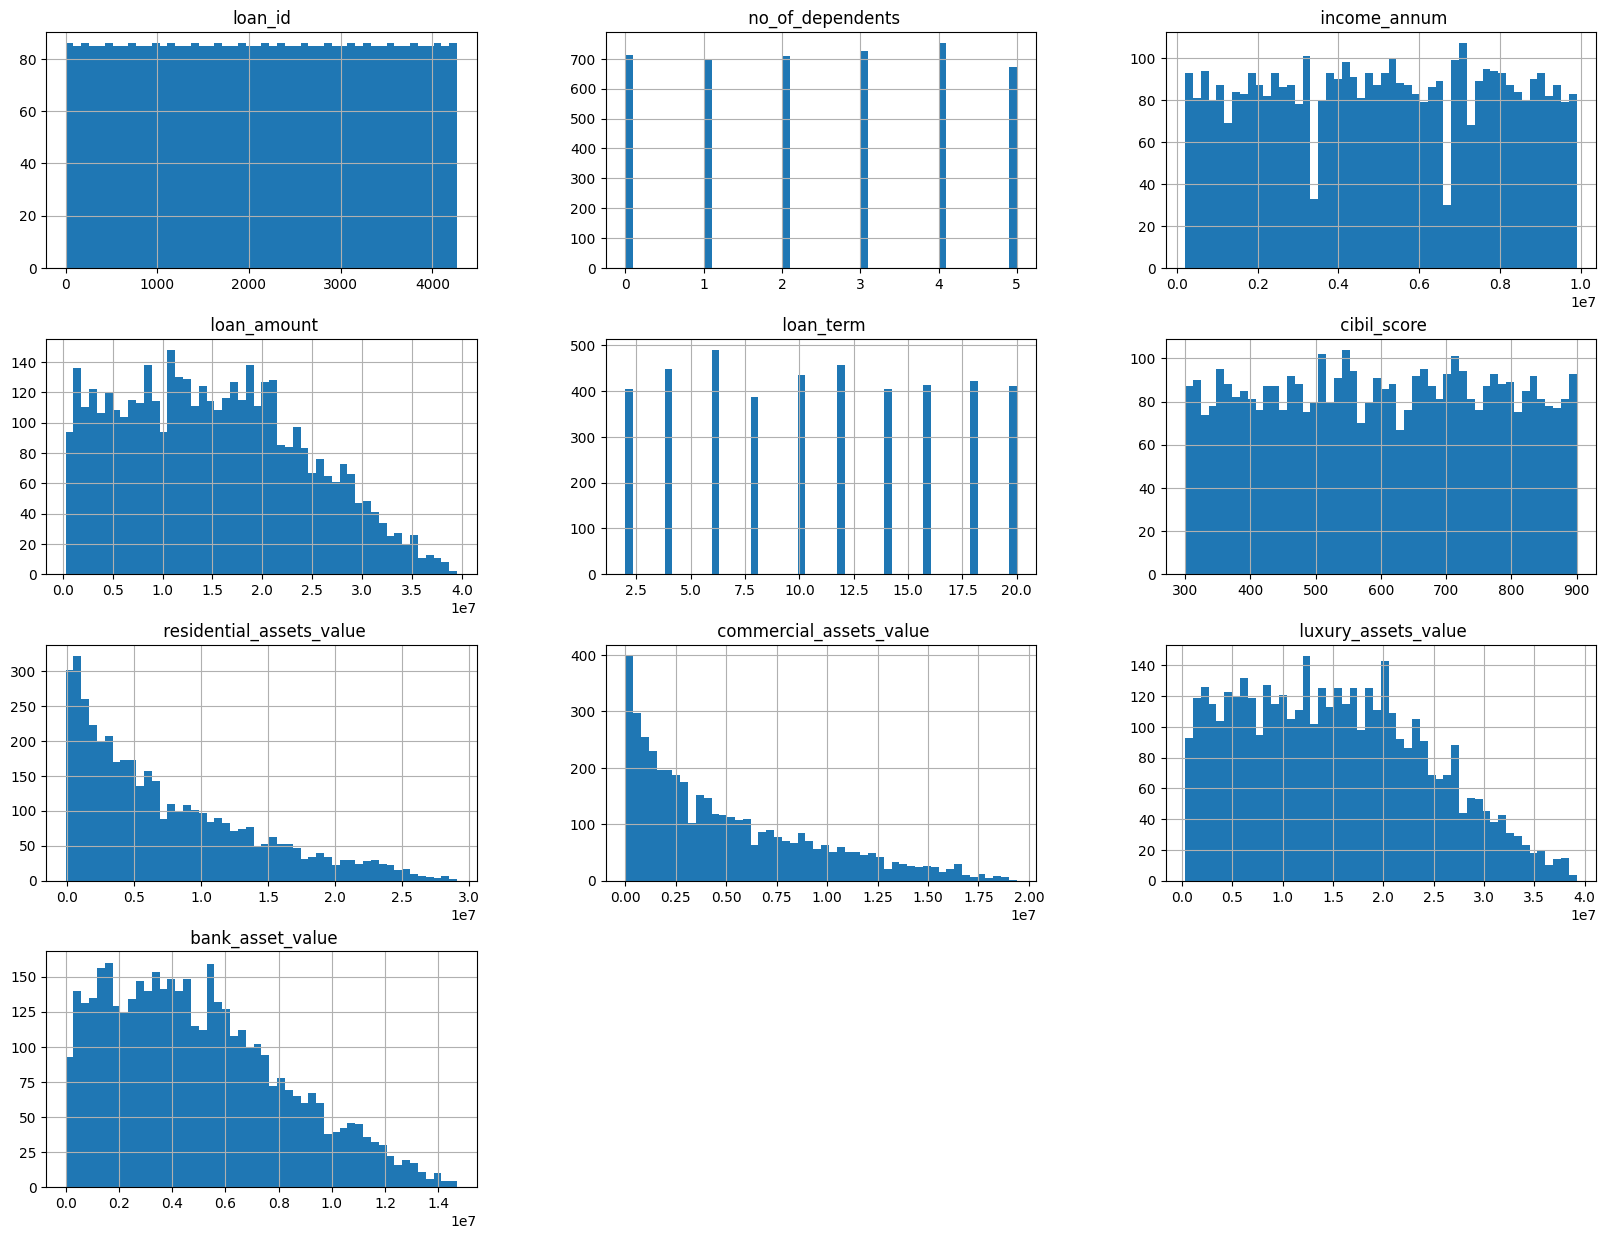

In [103]:
df.hist(bins=50, figsize=(20,15))
plt.show()


# Visualizing the relation between categoral features

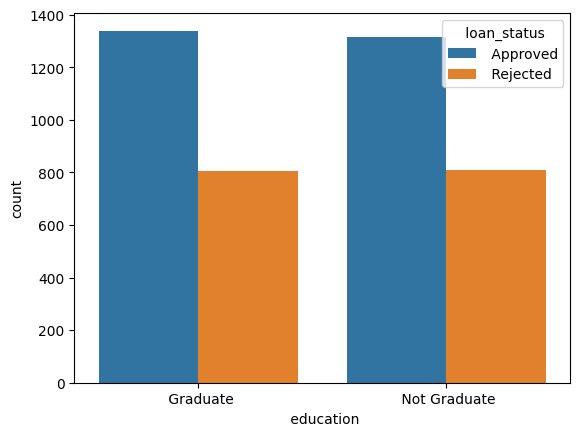

In [104]:
ax=sns.countplot(x= df[' education'], hue = ' loan_status', data = df)

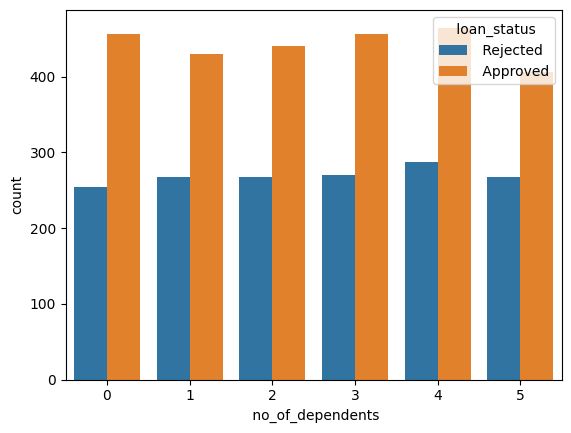

In [105]:
ax=sns.countplot(x= df[' no_of_dependents'], hue = ' loan_status', data = df)

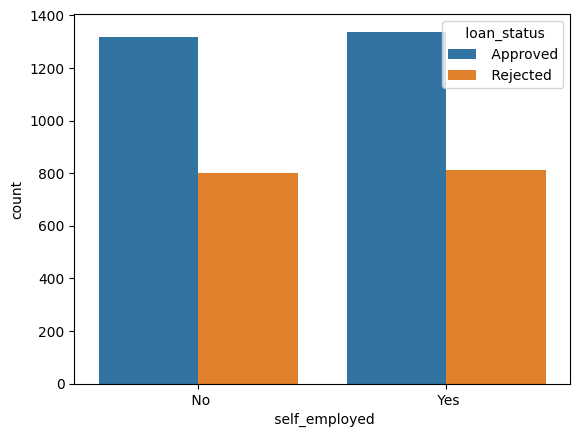

In [106]:
ax=sns.countplot(x= df[' self_employed'], hue = ' loan_status', data = df)

# Visualizing the relationship between our numerical features and target variables using Scatterplot

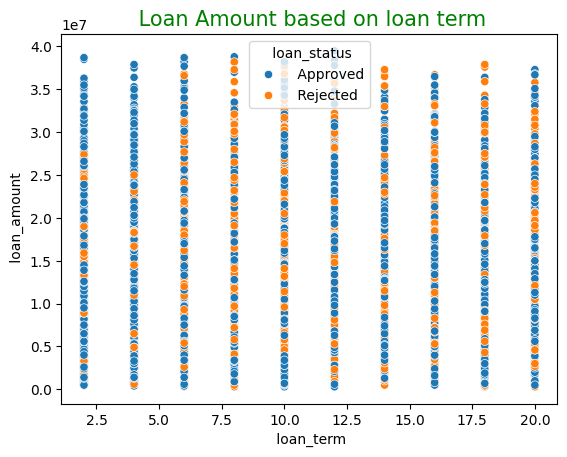

In [107]:
fig,ax = plt.subplots()
sns.scatterplot(data=df, x=' loan_term',y=' loan_amount', hue = ' loan_status')
plt.title(' Loan Amount based on loan term',color='Green', fontsize=15);
plt.show()

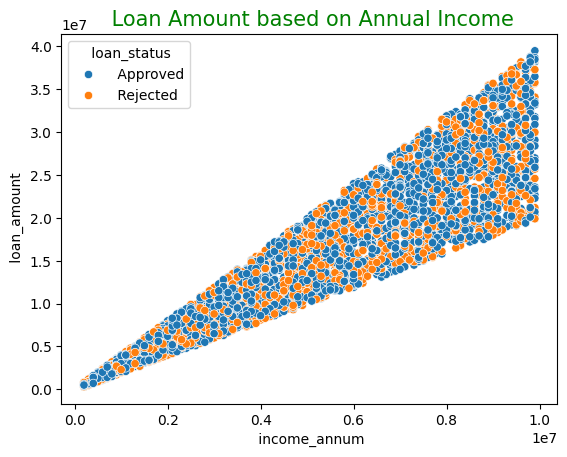

In [108]:
fig,ax = plt.subplots()
sns.scatterplot(data=df, x=' income_annum',y=' loan_amount', hue = ' loan_status')
plt.title(' Loan Amount based on Annual Income',color='Green', fontsize=15);
plt.show()

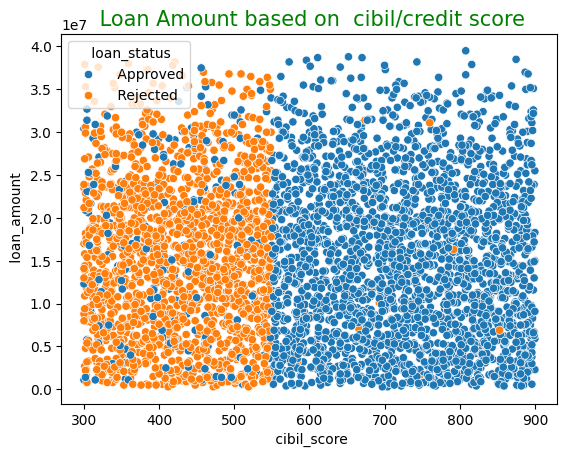

In [109]:
# credit score and cibil score are same
fig,ax = plt.subplots()
sns.scatterplot(data=df, x=' cibil_score',y=' loan_amount', hue = ' loan_status')
plt.title(' Loan Amount based on  cibil/credit score',color='Green', fontsize=15);
plt.show()

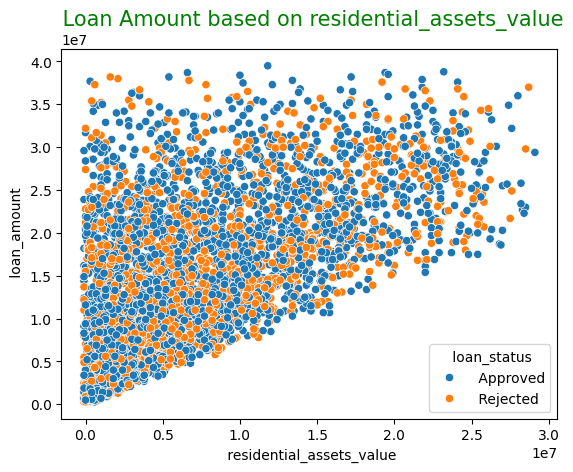

In [110]:
fig,ax = plt.subplots()
sns.scatterplot(data=df, x=' residential_assets_value',y=' loan_amount', hue = ' loan_status')
plt.title(' Loan Amount based on residential_assets_value',color='Green', fontsize=15);
plt.show()

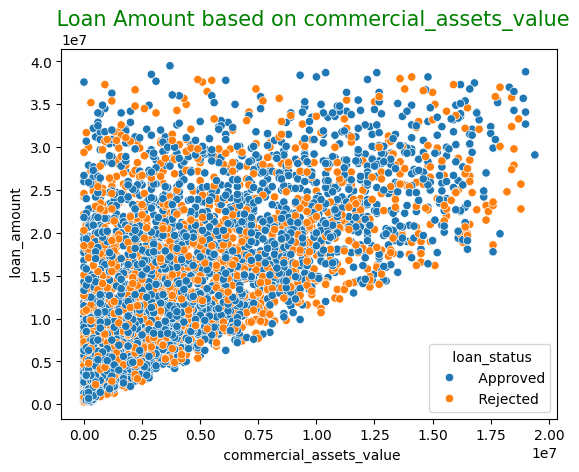

In [111]:
fig,ax = plt.subplots()
sns.scatterplot(data=df, x=' commercial_assets_value',y=' loan_amount', hue = ' loan_status')
plt.title(' Loan Amount based on commercial_assets_value',color='Green', fontsize=15);
plt.show()

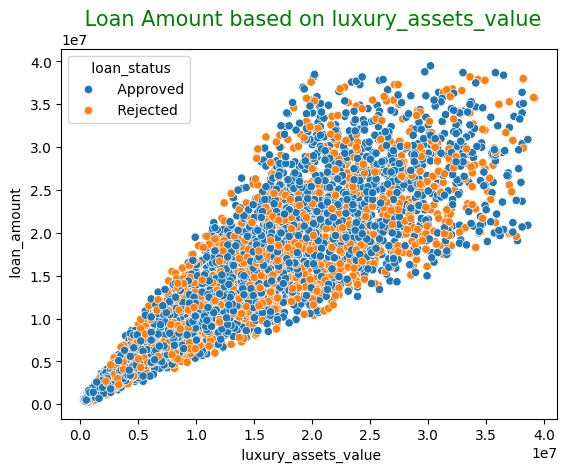

In [112]:
fig,ax = plt.subplots()
sns.scatterplot(data=df, x=' luxury_assets_value',y=' loan_amount', hue = ' loan_status')
plt.title(' Loan Amount based on luxury_assets_value',color='Green', fontsize=15);
plt.show()

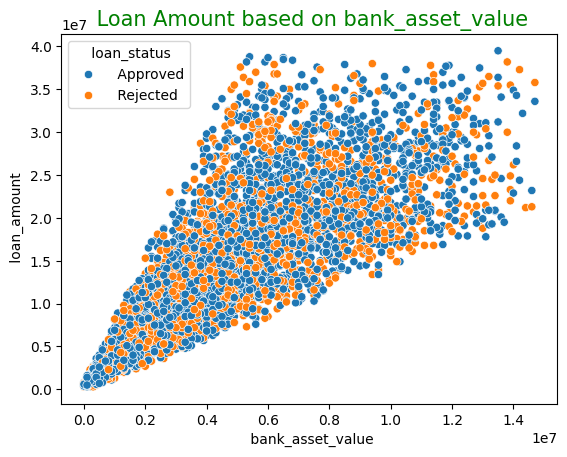

In [113]:
fig,ax = plt.subplots()
sns.scatterplot(data=df, x=' bank_asset_value',y=' loan_amount', hue = ' loan_status')
plt.title(' Loan Amount based on bank_asset_value',color='Green', fontsize=15);
plt.show()

# Corelation Matrix

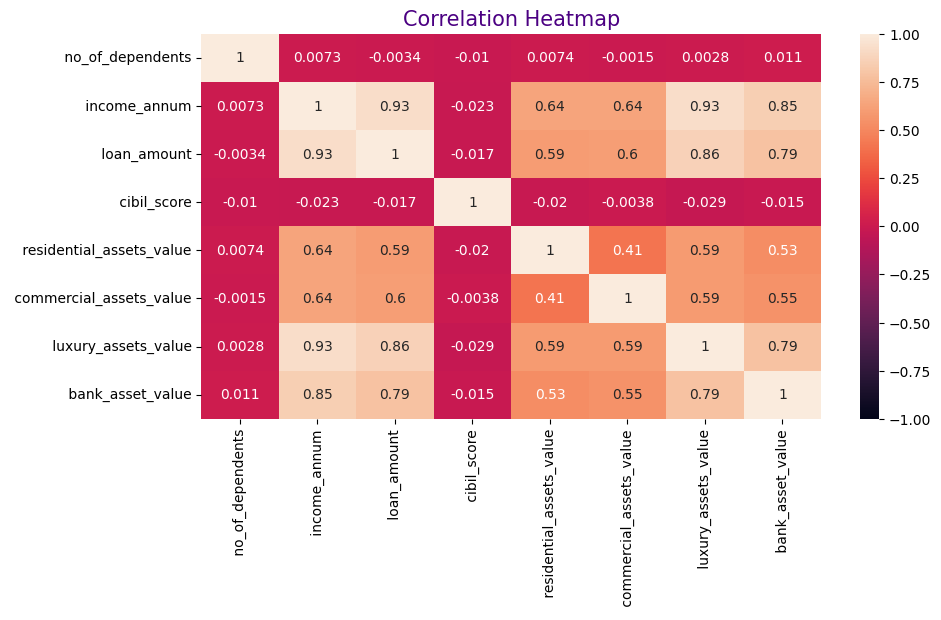

In [114]:
num_cols = [' no_of_dependents',' income_annum',' loan_amount',' cibil_score',' residential_assets_value',' commercial_assets_value',' luxury_assets_value',' bank_asset_value']
corr_matrix =df[num_cols].corr()
plt.figure(figsize=(10,5))
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap',color='indigo', fontsize=15)
plt.show()

# Feature Engineering

In [115]:
#Drop unwanted column
loan_new = df.drop (['loan_id'], axis = 1)
loan_new.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [116]:
# Getting list of columns having missing values
missing_columns = [col for col in loan_new.columns if loan_new[col].isnull().sum() > 0]
missing_columns

[]

In [117]:
#Displaying info of the new dataset
loan_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [118]:
#Checking for columns with mising value in the new dataset
loan_new.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

# Convert categorical values into numerical values

In [119]:
#calling the columns with data to be encoded
change_dtype = [' education',' self_employed',' loan_status']
loan_new[' education'].value_counts()

 education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64

In [125]:
loan_new[' education'].replace({'Graduate':1 ,  'NotGraduate':0}, inplace=True)
loan_new[' self_employed'].replace({' Yes':1 ,  ' No':0}, inplace=True)
loan_new[' loan_status'].replace({' Approved':1 ,  ' Rejected':0}, inplace=True)

In [121]:
loan_new.head(20)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,Not Graduate,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,Graduate,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,Graduate,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,Not Graduate,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
5,0,Graduate,1,4800000,13500000,10,319,6800000,8300000,13700000,5100000,0
6,5,Graduate,0,8700000,33000000,4,678,22500000,14800000,29200000,4300000,1
7,2,Graduate,1,5700000,15000000,20,382,13200000,5700000,11800000,6000000,0
8,0,Graduate,1,800000,2200000,20,782,1300000,800000,2800000,600000,1
9,5,Not Graduate,0,1100000,4300000,10,388,3200000,1400000,3300000,1600000,0


In [122]:
#Checking for data types after encoding
loan_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   int64 
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 400.3+ KB


In [123]:

X = loan_new.drop(' loan_status', axis = 1)#features
Y = loan_new[' loan_status']#target variable

loan_new[' loan_status'].value_counts()

 loan_status
1    2656
0    1613
Name: count, dtype: int64

# loan_status is inbalanced so to make a balanced training data we use smote


In [127]:
#approved records are more than rejected so to balance the data we used smote
smt = SMOTE()
x,y = smt.fit_resample(X,Y)

#Splitting the data to Train and Test Set
#80% training and 20% test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


ValueError: could not convert string to float: ' Graduate'

In [128]:
# checking the shape of the train and test datasets

print("The shape of x_train is: ",x_train.shape)
print("The shape of x_test is: ",x_test.shape)
print("The shape of y_train is: ",y_train.shape)
print("The shape of y_test is: ",y_test.shape)

NameError: name 'x_train' is not defined

# MODEL IMPLEMENTATION

In [129]:
#calculated train and test accuracy  for every model
logistic_reg = LogisticRegression()
randon_forest = RandomForestClassifier()
gussian_nb = GaussianNB()
gradient_boost = GradientBoostingClassifier()

model_list = [logistic_reg,randon_forest,gradient_boost,gussian_nb]

train_acc = []
test_acc = []

for i in model_list:
    i_model = i.fit(x_train,y_train)
    y_train_pred = i_model.predict(x_train)
    y_test_pred = i_model.predict(x_test)
    train_acc.append(accuracy_score(y_train,y_train_pred))
    test_acc.append(accuracy_score(y_test,y_test_pred))

NameError: name 'x_train' is not defined

In [130]:
# Create a dictionary to store the classifiers
classifiers = {
    'Logistic Regression': logistic_reg,
    'Random Forest': randon_forest,
    'Gaussian Naive Bayes': gussian_nb,
    'gradient boost':gradient_boost,
}

# Loop through the classifiers and display the classification report
for name, clf in classifiers.items():
    print('Classification Report for', name)
    y_pred = clf.predict(x_test)
    print(classification_report(y_test_pred, y_pred))

Classification Report for Logistic Regression


NameError: name 'x_test' is not defined

In [131]:
#plot confusion matrix
models = [logistic_reg, randon_forest, gussian_nb,gradient_boost]
model_names = ['Logistic Regression', 'Random Forest', 'Gaussian Naive Bayes', 'Gradient Boost']

for i, model in enumerate(models):
    # Fit the model to the training data
    model.fit(x_train, y_train_pred)
   
    # Make predictions on the test data
    y_pred = model.predict(x_test)
   
    # Evaluate the performance of the model
    cm = confusion_matrix(y_test_pred, y_pred)
    print(f"Confusion Matrix - {model_names[i]}:\n{cm}\n")

NameError: name 'x_train' is not defined

In [132]:
#Create a list for models
models = ['Logistic Regression','Random Forest Classifier','gradient_boost','Gaussian Naive Bayes']

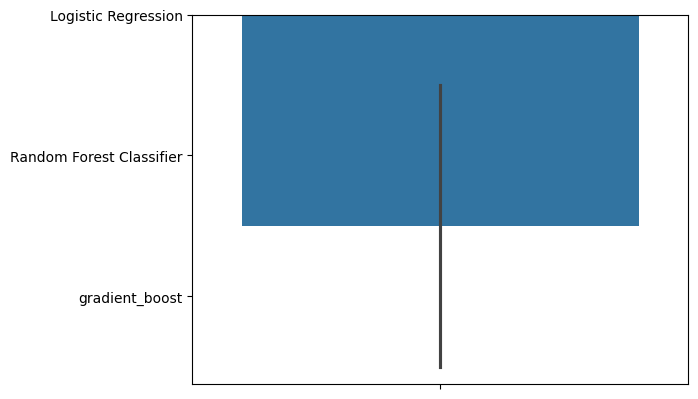

In [133]:
#visualizing the train model accuracy
model_list = [logistic_reg,randon_forest,gradient_boost,gussian_nb]

sns.barplot(y=models,x=train_acc)
plt.show()

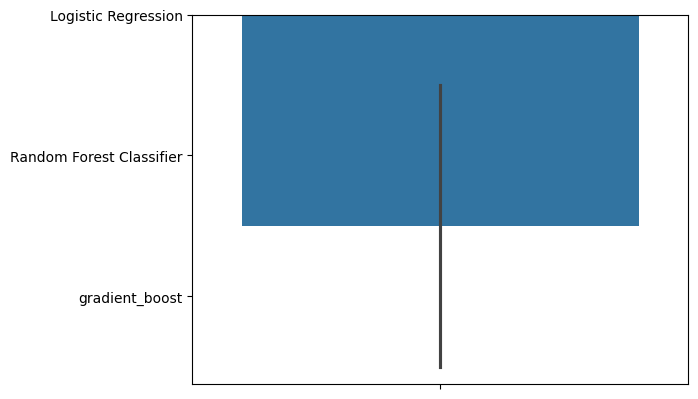

In [134]:
# visualizing the test model accuracy

sns.barplot(y=models,x=test_acc)
plt.show()

In [135]:
#plot a table to show the summary of each model performance
print(model_list)
model_summary = pd.DataFrame({'Model':model_list,'Train Score':train_acc,'Test Score':test_acc})
model_summary


[LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier(), GaussianNB()]


ValueError: All arrays must be of the same length

# create classification model list for ROC curve 

In [136]:
from sklearn.metrics import roc_curve, roc_auc_score

model_list = [logistic_reg,randon_forest,gradient_boost,gussian_nb]
model_names = ['Logistic Regression', 'Random Forest','gradient_boost', 'Gaussian Naive Bayes']
colors = ['orange', 'green', 'red','violet']

plt.figure(figsize=(8, 6))

for i, model in enumerate(model_list):
    model.fit(x_train, y_train)
    y_pred_prob = model.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, color=colors[i], label=model_names[i] + ' (AUC = {:.2f})'.format(auc))

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

NameError: name 'x_train' is not defined

<Figure size 800x600 with 0 Axes>

# Model Optimization

In [ ]:
from sklearn.utils import resample

#Undersampling the target variables

y = loan_new[' loan_status'] # target variable
target = y

# Separate majority and minority classes
majority_class = loan_new[y == 1]
minority_class = loan_new[y == 0]

# Undersample majority class
undersampled_majority = resample(majority_class,
                                 replace=False, # sampling without replacement
                                 n_samples=len(minority_class), # set the number of samples to match the minority class
                                 random_state=42) # for reproducibility

# Combine minority class and undersampled majority class
undersampled_loan = pd.concat([minority_class, undersampled_majority])

# Shuffle the data
undersampled_loan_new = undersampled_loan.sample(frac=1, random_state=42)
print("Shape of undersampled_loan:", undersampled_loan.shape)

In [ ]:
# Plot distribution of target variable before and after undersampling
fig, axs = plt.subplots(ncols=2, figsize=(12,6))
sns.countplot(data=loan_new, x=' loan_status', ax=axs[0])
axs[0].bar_label(axs[0].containers[0])
axs[0].set_title('Before Undersampling')
sns.countplot(data=undersampled_loan, x=' loan_status', ax=axs[1])
axs[1].bar_label(axs[1].containers[0])
axs[1].set_title('After Undersampling')
plt.show()

In [ ]:
#Cretae list of models
#Splitting data to train and test
X = loan_new.drop(' loan_status', axis = 1)#features
Y = loan_new[' loan_status']#target variable
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

models = [
    LogisticRegression(),
    RandomForestClassifier(),
    GaussianNB(),
    GradientBoostingClassifier()
]

# Perform k-fold cross-validation with k=5 for each model
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for model in models:
    cv_results = cross_val_score(model, x_train, y_train, cv=kf)
    print(f"Accuracy for {model.__class__.__name__}: {cv_results}")
    print(f"Average accuracy for {model.__class__.__name__}: {cv_results.mean()}\n")


In [ ]:
# now we are doing hyperparameter tuning
# # Define the hyperparameter search space for each model

lr_param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'max_iter': [1000]
}

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6]
}


gnb_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

gb_param_grid = {
}

# Instantiate each model
logistic_reg = LogisticRegression()
randonm_forest = RandomForestClassifier()
gussian_nb = GaussianNB()
gradient_boost = GradientBoostingClassifier()


In [ ]:
lr_grid_search = GridSearchCV(logistic_reg, lr_param_grid, cv=5, scoring='accuracy')
lr_grid_search.fit(x_train, y_train)

#Train the final model on the entire resampled training set with the best hyperparameters for each model
best_lr = LogisticRegression(**lr_grid_search.best_params_, random_state=42)
best_lr.fit(x_train, y_train)
# Get the training accuracy score
train_lr_accuracy = best_lr.score(x_train, y_train)

# Evaluate the final models on the test set for each model
lr_y_pred = best_lr.predict(x_test)
lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_confusion = confusion_matrix(y_test, lr_y_pred)


# Print the evaluation results
print("Logistic Regression")
print("Training Accuracy:", train_lr_accuracy)
print("Test Accuracy:", lr_accuracy)


In [ ]:
print("Confusion matrix:\n", confusion_matrix(y_test, lr_y_pred))
print("Classification report:\n", classification_report(y_test, lr_y_pred))

In [ ]:
rf_grid_search = GridSearchCV(randonm_forest, rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(x_train, y_train)

#Train the final model on the entire resampled training set with the best hyperparameters for each model
best_rf = RandomForestClassifier(**rf_grid_search.best_params_, random_state=42)
best_rf.fit(x_train, y_train)

# Get the training accuracy score
train_rf_accuracy = best_rf.score(x_train, y_train)


# Evaluate the final models on the test set for each model
rf_y_pred = best_rf.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_confusion = confusion_matrix(y_test, rf_y_pred)

# Print the evaluation results
print("RandomForestClassifier")
print("Training Accuracy:", train_rf_accuracy)
print("Test Accuracy:", rf_accuracy)

In [ ]:
print("Confusion matrix:\n", confusion_matrix(y_test, rf_y_pred))
print("Classification report:\n", classification_report(y_test, rf_y_pred))

In [ ]:
gussian_grid_search = GridSearchCV(gussian_nb, gnb_param_grid, cv=5, scoring='accuracy')
gussian_grid_search.fit(x_train, y_train)

#Train the final model on the entire resampled training set with the best hyperparameters for each model
best_gussian = GaussianNB(**gussian_grid_search.best_params_)
best_gussian.fit(x_train, y_train)

# Get the training accuracy score
train_gussian_accuracy = best_gussian.score(x_train, y_train)


# Evaluate the final models on the test set for each model
gussian_y_pred = best_gussian.predict(x_test)
gussian_accuracy = accuracy_score(y_test, gussian_y_pred)
gussian_confusion = confusion_matrix(y_test, gussian_y_pred)

# Print the evaluation results
print("gussian")
print("Training Accuracy:", train_gussian_accuracy)
print("Test Accuracy:", gussian_accuracy)

In [ ]:
print("Confusion matrix:\n", confusion_matrix(y_test, gussian_y_pred))
print("Classification report:\n", classification_report(y_test, gussian_y_pred))

In [ ]:
gradient_grid_search = GridSearchCV(gradient_boost, gb_param_grid, cv=5, scoring='accuracy')
gradient_grid_search.fit(x_train, y_train)

#Train the final model on the entire resampled training set with the best hyperparameters for each model
best_gradient = GaussianNB(**gradient_grid_search.best_params_)
best_gradient.fit(x_train, y_train)

# Get the training accuracy score
train_gradient_accuracy = best_gradient.score(x_train, y_train)


# Evaluate the final models on the test set for each model
gradient_y_pred = best_gradient.predict(x_test)
gradient_accuracy = accuracy_score(y_test, gradient_y_pred)
gradient_confusion = confusion_matrix(y_test, gradient_y_pred)

# Print the evaluation results
print("gradient")
print("Training Accuracy:", train_gradient_accuracy)
print("Test Accuracy:", gradient_accuracy)

In [ ]:
print("Confusion matrix:\n", confusion_matrix(y_test, gradient_y_pred))
print("Classification report:\n", classification_report(y_test, gradient_y_pred))

In [ ]:
# Create a dictionary of model names and their evaluation results
results = {
           'Logistic Regression': [lr_accuracy,train_lr_accuracy],
           'Random Forest': [rf_accuracy, train_rf_accuracy],
           'gussian_nb': [gussian_accuracy, train_gussian_accuracy],
           'gradient_boost': [gradient_accuracy, train_gradient_accuracy]}

# Convert the dictionary to a DataFrame
df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Test Accuracy', 'Training Accuracy'])

# Display the DataFrame
print(df_results)

In [ ]:
# Set the plot style
plt.style.use('ggplot')

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 7))
df_results.sort_values('Training Accuracy', ascending=True).plot(kind='barh', ax=ax)
# create 2nd Axis
ax2 = ax.twiny()
df_results.sort_values('Test Accuracy', ascending=True).plot(kind='barh', ax=ax2, alpha=0.5, color='C1')
ax2.xaxis.tick_top()
ax2.xaxis.set_label_position('top')
ax2.set_xlabel('Test Accuracy')

# Add the axis labels and Title
ax.set_xlabel('Training Accuracy')
ax.set_ylabel('Models')
ax.set_title('Comparison of Model Accuracies')

#Add Data Labels for Training Accuracy
for i, v in enumerate(df_results['Training Accuracy'].sort_values()):
    ax.text(v + 0.01, i, f'{v:.3f}', color='#333333', fontsize=12, va='center')

#Add Data Labels for Test Accuracy
for i, v in enumerate(df_results['Test Accuracy'].sort_values()):
    ax2.text(v + 0.01, i, f'{v:.3f}', color='#333333', fontsize=12, va='center')
# Show the plot
plt.show()


In [ ]:
# ROC curve after Grid search cv
from sklearn.metrics import roc_curve, roc_auc_score

model_list = [best_lr, best_rf, best_gussian, best_gradient]
model_names = ['Logistic Regression', 'Random Forest', 'Gaussian Naive Bayes','gradient_boost']
colors = ['blue', 'orange', 'green', 'red','yellow','pink']

plt.figure(figsize=(8, 6))

for i, model in enumerate(model_list):
    model.fit(x_train, y_train)
    y_pred_prob = model.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, color=colors[i], label=model_names[i] + ' (AUC = {:.2f})'.format(auc))

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
# Create a dictionary to store the classifiers
classifiers = {
    'Logistic Regression': logistic_reg,
    'Random Forest': randon_forest,
    'Gaussian Naive Bayes': gussian_nb,
    'gradient boost':gradient_boost,
}

# Loop through the classifiers and display the classification report
for name, clf in classifiers.items():
    print('Classification Report for', name)
    y_pred = clf.predict(x_test)
    print(classification_report(y_test, y_pred))

# FEATURE IMPORTANCE

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier model
rf_model = RandomForestClassifier()

# Fit the model on the training data
rf_model.fit(x_train, y_train)

# Get the feature importances
importances = pd.DataFrame({'Feature': x_train.columns, 'Importance': rf_model.feature_importances_})


In [ ]:
importances['Feature_importances'] = rf_model.feature_importances_
importances

In [ ]:
imp = importances.sort_values(by='Feature_importances',ascending=False)
imp

In [ ]:
# plotting based on feature importance order
sns.barplot(y=imp['Feature'],x=imp['Feature_importances'])
plt.show()

In [ ]:
imp['Feature'][0:7].values